![Header.jpeg](../assets/banner_linreg.png)

# Analisis dan Prediksi Konsumsi Energi pada Bangunan Menggunakan Algoritma *Lasso Regression*

---

<h2>Daftar isi</h2>

- <a href=#bu>Business Understanding</a>
- <a href=#du>Data Understanding</a>
- <a href=#dp>Data Preparation</a>
- <a href=#ml>Modeling</a>
- <a href=#ev>Evaluation</a>
- <a href=#dy>Deployment</a>


<hr>


*<h2 id='bu'>Business Understanding</h2>*

Dataset "Energy Consumption" berguna untuk mengetahui pola penggunaan energi yang dibutuhkan oleh suatu bangunan berdasarkan karakteristiknya, sehingga dataset ini mampu  membantu prediksi kebutuhan energi dari berbagai jenis bangunan dan bermacam-macam faktor lingkungan lainnya. Hal ini dapat berguna dalam memperkirakan rata-rata biaya yang dibutuhkan dan juga memungkinkan pemilik dalam mengoptimisasi penggunaan energi yang lebih efisien.

Dataset ini terdiri dari 7 macam fitur yang terbagi menjadi dua jenis data yaitu data latih dan data uji, yang masing-masing berjumlah 1000 baris data uji dan 100 baris data latih. Kolom-kolom pada dataset ini terdiri dari:

1. **Building Type** : Fitur untuk menjelaskan kategori bangunan
2. **Square Footage** : Fitur yang merepresentasikan luas bangunan dalam satuan meter persegi
3. **Number of Occupation** : Fitur yang memberikan informasi mengenai banyak penghuni dengan tipe data  
4. **Appliances Used** : Fitur yang memberikan informasi mengenai jumlah peralatan yang ada
5. **Average Temparature** : Fitur mengenai rata-rata suhu dalam satuan derajat celcius
6. **Day of Week** : Fitur ini menunjukkan data point diambil selama hari kerja (weekday) atau akhir pekan (weekend)
7. **Energy Consumption** : Fitur target mengenai banyaknya energi yang dikonsumsi dalam satuan kWh (Kilowatt-hours)ktt-hours)"

#### Data Source:
https://www.kaggle.com/datasets/govindaramsriram/energy-consumption-dataset-linear-regression

<hr>

*<h2 id='du'>Data Understanding</h2>*

#### Impor Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

#### Impor Data

In [2]:
df_train = pd.read_csv("../data/train_energy_data.csv")
df_train.tail()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
995,Residential,14419,68,44,23.95,Weekend,3661.21
996,Industrial,12194,7,22,14.67,Weekend,3546.34
997,Commercial,39562,88,20,32.18,Weekday,5147.21
998,Residential,8348,67,37,16.48,Weekend,3244.98
999,Commercial,15813,57,11,31.40,Weekend,3423.63


In [3]:
df_test = pd.read_csv("../data/test_energy_data.csv")
df_test.tail()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
95,Commercial,1161,81,11,15.45,Weekend,3010.81
96,Residential,37943,50,23,21.73,Weekend,4248.49
97,Commercial,1558,27,29,16.86,Weekend,2843.60
98,Industrial,2145,56,12,11.77,Weekend,3348.39
99,Residential,42414,72,24,29.62,Weekday,4722.59


In [4]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.tail()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
1095,Commercial,1161,81,11,15.45,Weekend,3010.81
1096,Residential,37943,50,23,21.73,Weekend,4248.49
1097,Commercial,1558,27,29,16.86,Weekend,2843.60
1098,Industrial,2145,56,12,11.77,Weekend,3348.39
1099,Residential,42414,72,24,29.62,Weekday,4722.59


#### Informasi Kolom

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1100 non-null   object 
 1   Square Footage       1100 non-null   int64  
 2   Number of Occupants  1100 non-null   int64  
 3   Appliances Used      1100 non-null   int64  
 4   Average Temperature  1100 non-null   float64
 5   Day of Week          1100 non-null   object 
 6   Energy Consumption   1100 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 60.3+ KB


- Building Type: Fitur kategoris yang mewakili tipe bangunan.

- Square Footage: Fitur numerik yang mewakili total luas persegi bangunan.

- Number of Occupants: Fitur numerik yang menunjukkan jumlah orang yang menempati bangunan.

- Appliances Used: Fitur numerik yang mewakili jumlah peralatan yang digunakan di dalam bangunan.

- Average Temperature: Fitur numerik yang mewakili suhu rata-rata bangunan atau area iklim (dalam Celsius).

- Day of Week t: Fitur kategoris yang mewakili apakah titik data sesuai dengan hari kerja atau akhir pekan.

- Energy Consumption: Variabel target numerik yang mewakili konsumsi energi bangunan dalam kWh (kilowatt-jam). Ini adalah nilainya

#### Statistik Deskriptif

In [6]:
df.describe(include="all")

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
count,1100,1100.000000,1100.000000,1100.000000,1100.000000,1100,1100.000000
unique,3,NaN,NaN,NaN,NaN,2,NaN
top,Residential,NaN,NaN,NaN,NaN,Weekday,NaN
freq,387,NaN,NaN,NaN,NaN,551,NaN
mean,NaN,25500.527273,48.268182,25.730000,22.559745,NaN,4168.191273
std,NaN,14236.955632,29.127624,14.116209,7.122357,NaN,924.278723
min,NaN,560.000000,1.000000,1.000000,10.050000,NaN,1683.950000
25%,NaN,13203.750000,22.000000,13.000000,16.365000,NaN,3510.460000
50%,NaN,25785.500000,47.000000,26.000000,22.810000,NaN,4189.690000
75%,NaN,37536.750000,73.000000,38.000000,28.760000,NaN,4859.510000


In [7]:
def dist_obj_cols(feature: str):
    ax = sns.histplot(x=df[feature])

    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + (p.get_width() / 2), p.get_height()), 
                    ha='center', va='bottom', fontsize=12)
    plt.show()

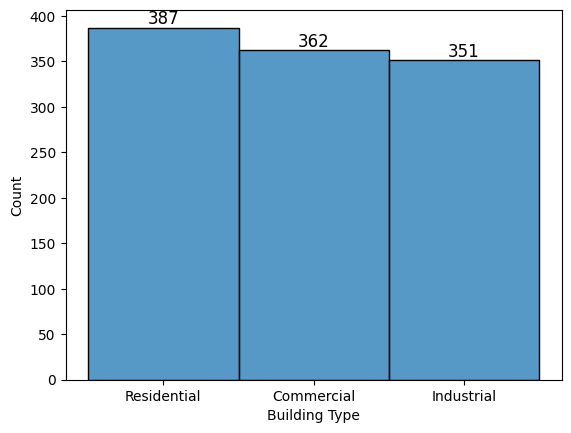

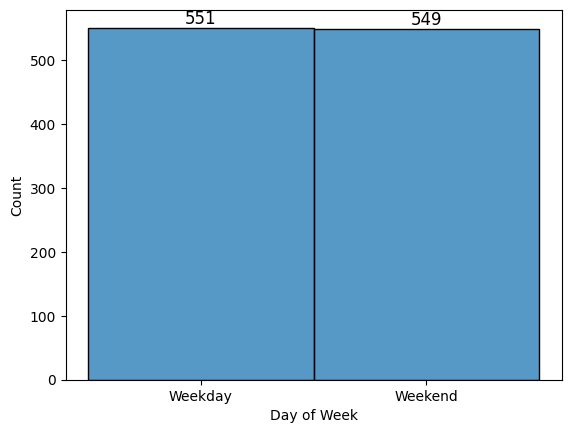

In [8]:
for x in df.columns:
    if df[x].dtype == "object":
        dist_obj_cols(x)

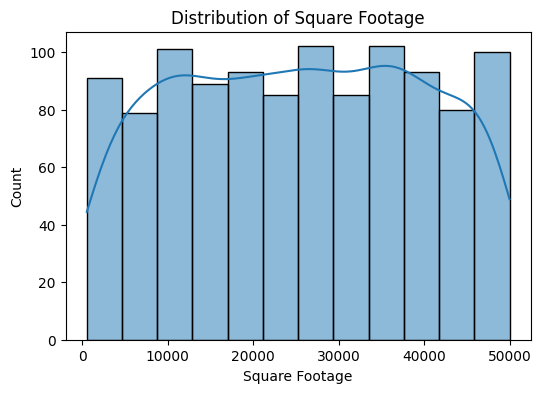

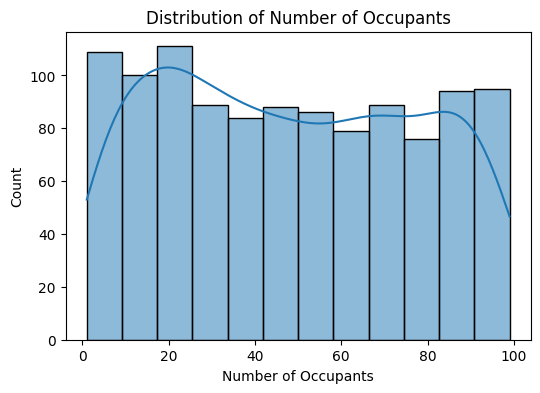

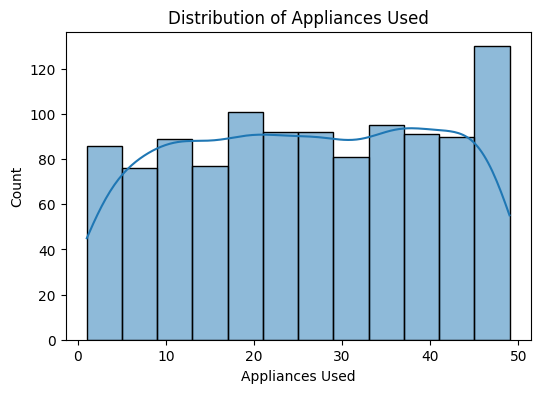

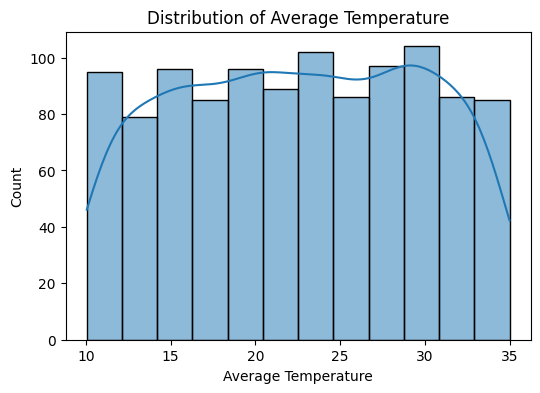

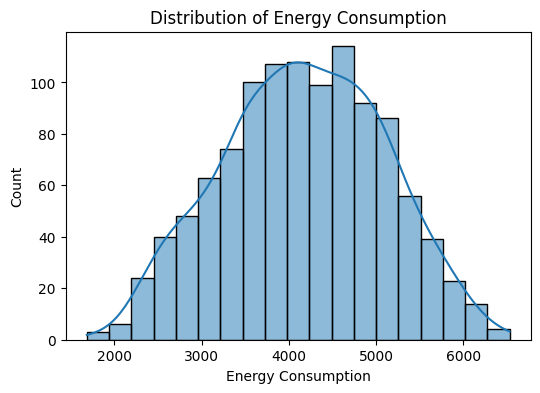

In [9]:
for x in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[x], kde=True)
    plt.title(f'Distribution of {x}')
    
plt.show()

<hr>

*<h2 id='du'>Data Preparation</h2>*

#### Cek Data Null

In [10]:
df.isna().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

#### Cek Data Duplikat

In [11]:
df.duplicated().sum()

0

#### Cek Outlier

In [12]:
df_check_outlier = df.select_dtypes(exclude=["object"])

In [13]:
q1 = df_check_outlier.quantile(0.25)
q3 = df_check_outlier.quantile(0.75)
iqr = q3 - q1
low_bound = q1 - (1.5 * iqr)
up_bound = q3 + (1.5 * iqr)

outliers = ((df_check_outlier < low_bound) | (df_check_outlier > up_bound))
outliers.sum()

Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Energy Consumption     0
dtype: int64

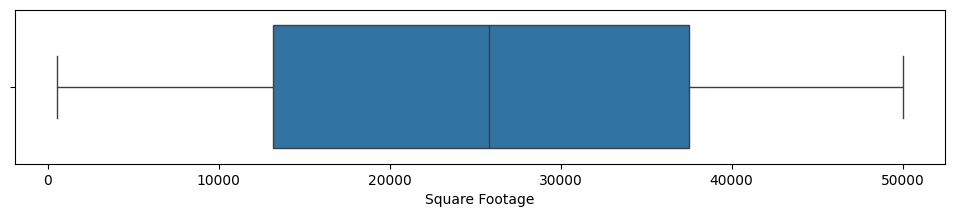

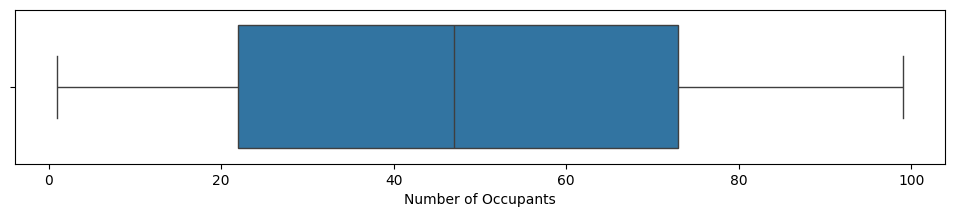

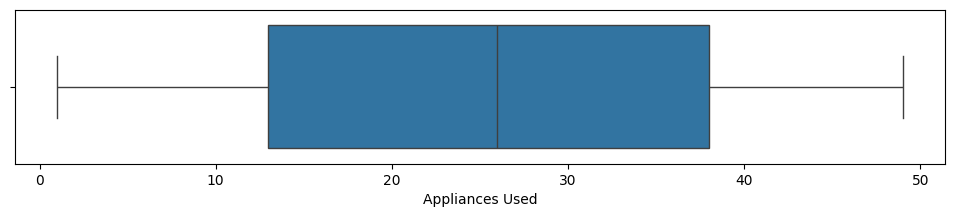

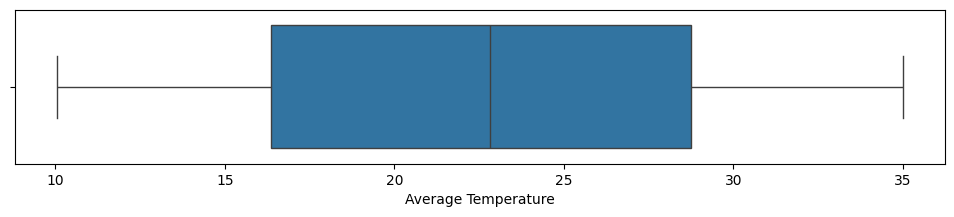

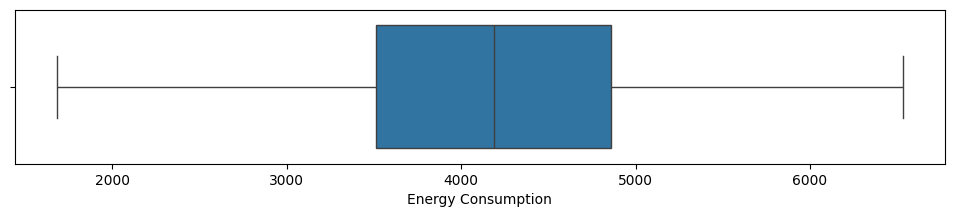

In [14]:
for x in df_check_outlier:
    plt.figure(figsize=(12, 2))
    sns.boxplot(data=df_check_outlier, x=x)

plt.show()

#### Encoding

In [15]:
df.select_dtypes(include=["object"]).columns

Index(['Building Type', 'Day of Week'], dtype='object')

In [16]:
df_encoded = pd.get_dummies(
    data=df,
    columns=df.select_dtypes(include=["object"]).columns
)

df_encoded.tail()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type_Commercial,Building Type_Industrial,Building Type_Residential,Day of Week_Weekday,Day of Week_Weekend
1095,1161,81,11,15.45,3010.81,True,False,False,False,True
1096,37943,50,23,21.73,4248.49,False,False,True,False,True
1097,1558,27,29,16.86,2843.60,True,False,False,False,True
1098,2145,56,12,11.77,3348.39,False,True,False,False,True
1099,42414,72,24,29.62,4722.59,False,False,True,True,False


In [17]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Square Footage             1100 non-null   int64  
 1   Number of Occupants        1100 non-null   int64  
 2   Appliances Used            1100 non-null   int64  
 3   Average Temperature        1100 non-null   float64
 4   Energy Consumption         1100 non-null   float64
 5   Building Type_Commercial   1100 non-null   bool   
 6   Building Type_Industrial   1100 non-null   bool   
 7   Building Type_Residential  1100 non-null   bool   
 8   Day of Week_Weekday        1100 non-null   bool   
 9   Day of Week_Weekend        1100 non-null   bool   
dtypes: bool(5), float64(2), int64(3)
memory usage: 48.5 KB


In [18]:
new_df = df_encoded.astype("float64")

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Square Footage             1100 non-null   float64
 1   Number of Occupants        1100 non-null   float64
 2   Appliances Used            1100 non-null   float64
 3   Average Temperature        1100 non-null   float64
 4   Energy Consumption         1100 non-null   float64
 5   Building Type_Commercial   1100 non-null   float64
 6   Building Type_Industrial   1100 non-null   float64
 7   Building Type_Residential  1100 non-null   float64
 8   Day of Week_Weekday        1100 non-null   float64
 9   Day of Week_Weekend        1100 non-null   float64
dtypes: float64(10)
memory usage: 86.1 KB


In [20]:
new_df.head()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type_Commercial,Building Type_Industrial,Building Type_Residential,Day of Week_Weekday,Day of Week_Weekend
0,7063.0,76.0,10.0,29.84,2713.95,0.0,0.0,1.0,1.0,0.0
1,44372.0,66.0,45.0,16.72,5744.99,1.0,0.0,0.0,1.0,0.0
2,19255.0,37.0,17.0,14.30,4101.24,0.0,1.0,0.0,0.0,1.0
3,13265.0,14.0,41.0,32.82,3009.14,0.0,0.0,1.0,1.0,0.0
4,13375.0,26.0,18.0,11.92,3279.17,1.0,0.0,0.0,1.0,0.0


#### Cek Korelasi

<Axes: >

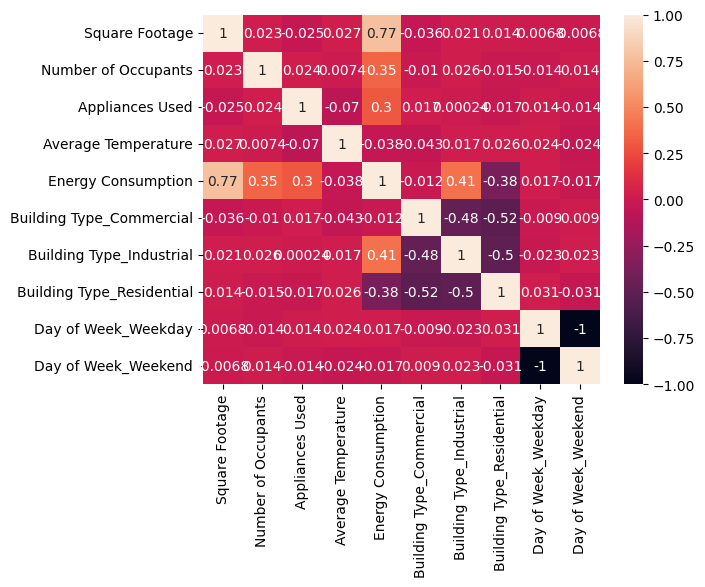

In [21]:
sns.heatmap(new_df.corr(), annot=True)

#### Splitting Data

In [22]:
X = new_df.drop(columns="Energy Consumption")
y = new_df["Energy Consumption"]

In [23]:
X

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Building Type_Commercial,Building Type_Industrial,Building Type_Residential,Day of Week_Weekday,Day of Week_Weekend
0,7063.0,76.0,10.0,29.84,0.0,0.0,1.0,1.0,0.0
1,44372.0,66.0,45.0,16.72,1.0,0.0,0.0,1.0,0.0
2,19255.0,37.0,17.0,14.30,0.0,1.0,0.0,0.0,1.0
3,13265.0,14.0,41.0,32.82,0.0,0.0,1.0,1.0,0.0
4,13375.0,26.0,18.0,11.92,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1095,1161.0,81.0,11.0,15.45,1.0,0.0,0.0,0.0,1.0
1096,37943.0,50.0,23.0,21.73,0.0,0.0,1.0,0.0,1.0
1097,1558.0,27.0,29.0,16.86,1.0,0.0,0.0,0.0,1.0
1098,2145.0,56.0,12.0,11.77,0.0,1.0,0.0,0.0,1.0


In [24]:
y

0       2713.95
1       5744.99
2       4101.24
3       3009.14
4       3279.17
         ...   
1095    3010.81
1096    4248.49
1097    2843.60
1098    3348.39
1099    4722.59
Name: Energy Consumption, Length: 1100, dtype: float64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train.head()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Building Type_Commercial,Building Type_Industrial,Building Type_Residential,Day of Week_Weekday,Day of Week_Weekend
507,23650.0,82.0,29.0,20.36,0.0,0.0,1.0,1.0,0.0
551,27205.0,44.0,14.0,11.38,1.0,0.0,0.0,0.0,1.0
290,7424.0,25.0,47.0,14.83,1.0,0.0,0.0,1.0,0.0
2,19255.0,37.0,17.0,14.30,0.0,1.0,0.0,0.0,1.0
6,38638.0,92.0,14.0,21.01,0.0,1.0,0.0,0.0,1.0


In [27]:
X_test.head()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Building Type_Commercial,Building Type_Industrial,Building Type_Residential,Day of Week_Weekday,Day of Week_Weekend
328,7319.0,21.0,37.0,31.57,0.0,1.0,0.0,1.0,0.0
688,7138.0,60.0,27.0,34.94,1.0,0.0,0.0,1.0,0.0
413,47537.0,34.0,17.0,16.60,1.0,0.0,0.0,1.0,0.0
788,30720.0,3.0,15.0,10.22,0.0,0.0,1.0,0.0,1.0
244,22542.0,58.0,47.0,32.58,0.0,0.0,1.0,0.0,1.0


#### Skalasi Data

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
X_train_scaled

array([[-0.12757915,  1.15431823,  0.26267506, ...,  1.37304257,
         1.01142894, -1.01142894],
       [ 0.12342101, -0.15501326, -0.80124355, ..., -0.72830954,
        -0.9887002 ,  0.9887002 ],
       [-1.27321306, -0.809679  ,  1.53937738, ..., -0.72830954,
         1.01142894, -1.01142894],
       ...,
       [ 0.78971875, -0.43066199,  0.47545878, ...,  1.37304257,
        -0.9887002 ,  0.9887002 ],
       [-1.71541108,  1.11986213, -1.01402727, ..., -0.72830954,
        -0.9887002 ,  0.9887002 ],
       [ 0.13281145, -0.3962059 ,  1.6812332 , ..., -0.72830954,
         1.01142894, -1.01142894]])

In [30]:
X_test_scaled

array([[-1.28062656, -0.94750337,  0.83009831, ..., -0.72830954,
         1.01142894, -1.01142894],
       [-1.29340604,  0.39628421,  0.12081924, ..., -0.72830954,
         1.01142894, -1.01142894],
       [ 1.55895833, -0.49957417, -0.58845983, ..., -0.72830954,
         1.01142894, -1.01142894],
       ...,
       [ 0.08861283,  0.39628421,  1.18473785, ...,  1.37304257,
         1.01142894, -1.01142894],
       [ 1.64636711,  0.18954766,  0.12081924, ...,  1.37304257,
         1.01142894, -1.01142894],
       [ 1.70729907, -0.67185463, -0.73031564, ...,  1.37304257,
         1.01142894, -1.01142894]])

<hr>

*<h2 id='ml'>Modeling</h2>*

In [31]:
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10], cv=5)
lasso_cv.fit(X_train_scaled, y_train)

print("Best alpha:", lasso_cv.alpha_)

Best alpha: 0.001


In [32]:
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.001)

In [33]:
y_pred = lasso_model.predict(X_test_scaled)

In [34]:
res = pd.DataFrame({"Actual": y_test, "Pred": y_pred})
res.sample(10)

,Actual,Pred
327,4258.49,4258.503424
946,4443.15,4443.153054
1031,4603.83,4603.849818
945,5669.86,5669.843564
588,5867.13,5867.147813
989,4979.87,4979.846891
404,4584.62,4584.596730
12,4070.21,4070.199249
888,3771.12,3771.100696
873,4956.67,4956.651433


<hr>

*<h2 id='ml'>Evaluation</h2>*

In [35]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

MAE: 0.012374608015418495
Mean Squared Error: 0.0002
R² Score: 1.0000


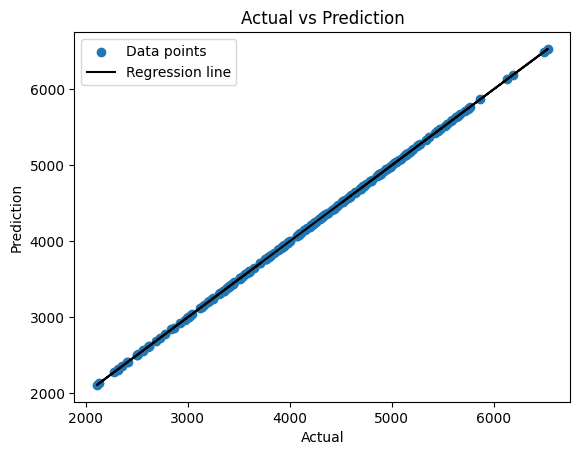

In [36]:
plt.scatter(y_test, y_pred, label='Data points')
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, color='black', label='Regression line')

plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.title("Actual vs Prediction")
plt.legend()

plt.show()

<hr>

*<h2 id='ml'>Deployment</h2>*

In [37]:
joblib.dump(lasso_model, "../models/model_lasso.joblib")

['../models/model_lasso.joblib']



---


Copyright © 2025 by DGX Development Team, Gunadarma University


https://www.hpc-hub.gunadarma.ac.id/